In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
data = pd.read_excel("Temporary_data3_Left_Right_Copy.xlsx")
data.head()

,SEX,EDUC,MARISTAT,INDEPEND,RESIDENC,NACCFAM,ANYMEDS,SMOKYRS,NACCTBI,DIABETES,...,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM
0,2,18,1,1,1,1,1,0,0,0,...,27.9038,2.2157,10.3481,1.7014,13.4250,1.7419,9.8700,1.6792,0.8906,1.1947
1,1,11,1,1,1,1,1,0,0,0,...,29.0600,2.6900,9.2500,1.6300,14.8800,2.3000,7.2700,1.8900,1.3800,2.0300
2,2,16,1,1,1,1,1,10,0,1,...,33.0000,2.5400,13.6900,1.5600,16.2300,2.0700,10.1100,1.8400,1.0100,1.5000
3,1,14,1,1,1,0,1,0,0,1,...,31.6800,2.4100,9.6400,1.4500,15.1100,1.6400,10.3900,1.8300,0.7400,1.1000
4,1,16,1,1,2,0,1,50,0,0,...,28.0631,1.9501,9.1125,1.0427,13.3763,1.6270,7.5844,1.4595,0.6638,0.8527


TASK-6A: Please use the latest version of the AD dataset to provide the following outputs:

y : CDRGLOB

X : all columns except for the label

Train-test split: .80-.20 (please use the stratify parameter)

Cross-validation both with k=5 and k=10

Please compare and discuss the outputs obtained from the cross validation step by k=5 and k=10.


In [81]:
y = data["CDRGLOB"]
X = data.drop("CDRGLOB",axis=1)
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0,
                                  train_size=0.8)

In [82]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()

RFC.fit(Xtrain,ytrain)

RandomForestClassifier()

In [83]:
from sklearn.model_selection import cross_val_score
cv_five = cross_val_score(RFC, X, y, cv=5)
print(cv_five)
print("Mean value: ", cv_five.mean())

[0.73431734 0.60147601 0.7195572  0.66051661 0.56666667]
Mean value:  0.6565067650676507


In [84]:
cv_ten = cross_val_score(RFC, X, y, cv=10)
print(cv_ten)
print("Mean value: ", cv_ten.mean())

[0.72794118 0.73529412 0.61764706 0.63970588 0.77777778 0.6962963
 0.74074074 0.52592593 0.48148148 0.68148148]
Mean value:  0.6624291938997822


Her iki cv değeri için ortalamaya baktığımızda birbirine çok yakın çıktığını görüyoruz. Fakat cv=10 parametresi ile gelen sonuç biraz daha iyi diyebiliriz.

TASK-6B: Please perform a grid search run with the use of a ML algorithm (and its 3 parameters at least with 5 different values for each) you select as opposed to the Gaussian Naive Bayes algorithm. Then compare the outputs with respect to the accuracy values on the test dataset. 

In [85]:
model_rfc = RFC.predict(Xtest)

from sklearn.metrics import accuracy_score
accuracy_score(ytest, model_rfc)
#Accuracy score is well for me, I will try to improve it with GridSearch

0.7047970479704797

In [86]:
my_n_estimators = np.linspace(10,100,num=5,dtype="int")
my_n_estimators #My first parameter

array([ 10,  32,  55,  77, 100])

In [87]:
my_min_samples_split = np.linspace(1,8,num=5,dtype="int")
my_min_samples_split #My second parameter

array([1, 2, 4, 6, 8])

In [88]:
my_min_samples_leaf = np.linspace(1,10,num=5,dtype="int")
my_min_samples_leaf #My last parameter

array([ 1,  3,  5,  7, 10])

In [89]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': my_n_estimators,
              'min_samples_split': my_min_samples_split,
              'min_samples_leaf': my_min_samples_leaf}

grid = GridSearchCV(estimator=RFC, param_grid=param_grid, cv= 10)

In [90]:
grid.fit(Xtrain, ytrain);

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
250 fits failed out of a total of 1250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/

In [91]:
grid.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 100}

Accuracy score before GridSearch:  0.7047970479704797
Accuracy score after GridSearch:  0.7380073800738007


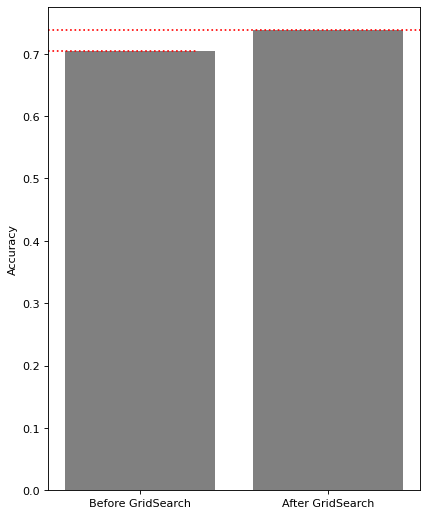

In [139]:
RFC = grid.best_estimator_
my_predictions = RFC.fit(Xtrain,ytrain).predict(Xtest)
print("Accuracy score before GridSearch: ",accuracy_score(ytest, model_rfc))
print("Accuracy score after GridSearch: ",accuracy_score(ytest, my_predictions))
#GridSearch improved my accuracy a little bit.
plt.figure(figsize=(6, 8), dpi=80)
plt.bar(range(2), [accuracy_score(ytest, model_rfc), accuracy_score(ytest, my_predictions)], align='center', color="gray")
plt.ylabel("Accuracy")
plt.axhline(y=accuracy_score(ytest, model_rfc), color="red", linestyle="dotted",xmax=0.4)
plt.axhline(y=accuracy_score(ytest, my_predictions), color="red", linestyle="dotted")
plt.xticks(range(2), ["Before GridSearch","After GridSearch"])
plt.show()

TASK-6C: Please provide a visualization of the best algorithm with respect to the two of the dimensions in the dataset and please annotate the labels (separately for true labels and predicted labels in 2 different graphs). For instance, x-axis might be RPARCORT and y-axis might be LTEMPCOR.

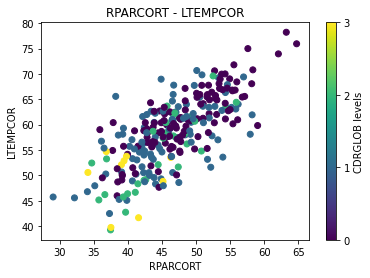

In [129]:
plt.scatter(Xtest["RPARCORT"], Xtest["LTEMPCOR"],c=ytest)
plt.title("RPARCORT - LTEMPCOR")
plt.colorbar(label="CDRGLOB levels", ticks = range(4))
plt.ylabel("LTEMPCOR")
plt.xlabel("RPARCORT")
plt.show();

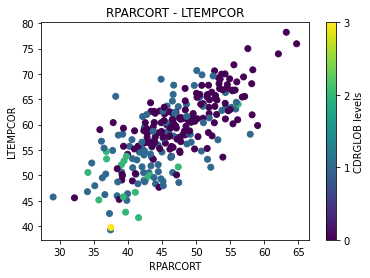

In [144]:
plt.scatter(Xtest["RPARCORT"], Xtest["LTEMPCOR"],c=my_predictions)
plt.title("RPARCORT - LTEMPCOR")
plt.colorbar(label="CDRGLOB levels", ticks = range(4))
plt.ylabel("LTEMPCOR")
plt.xlabel("RPARCORT")
plt.show();

TASK-6D: Please apply one of the dimensionality reduction methods (PCA or isomap) and reduce the features matrix into 2 extracted dimensions. Then provide a visualization with respect to these dimensions. 

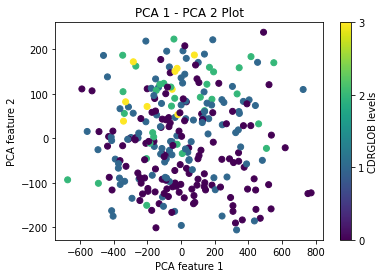

In [127]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_x = pca.fit_transform(Xtest)
plt.scatter(pca_x[:,0], pca_x[:,1], c=ytest)
plt.title("PCA 1 - PCA 2 Plot")
plt.colorbar(label="CDRGLOB levels", ticks = range(4))
plt.ylabel("PCA feature 2")
plt.xlabel("PCA feature 1")
plt.show()

TASK-6E: Please perform one of the clustering techniques (k-means or GMM) on the dataset (on the features matrix) then again provide a visual illustration with respect to the features like age, education. 

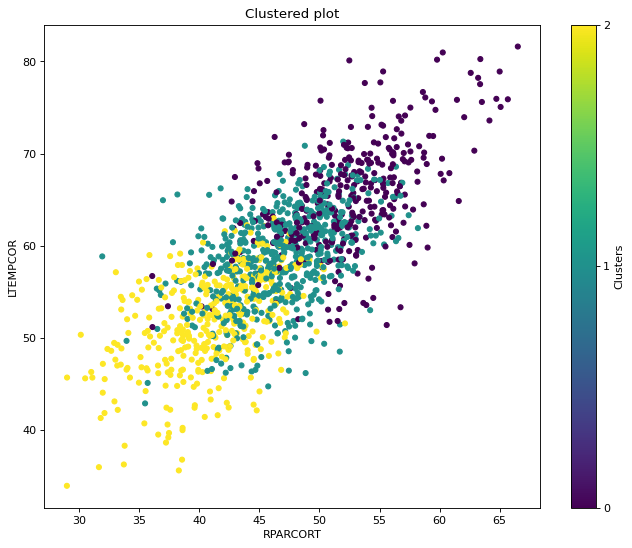

In [141]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state=0)
my_clusters = kmeans.fit_predict(X)
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(X["RPARCORT"], X["LTEMPCOR"],c=my_clusters, s=20)
plt.title("Clustered plot")
plt.colorbar(label="Clusters",ticks=range(3))
plt.ylabel("LTEMPCOR")
plt.xlabel("RPARCORT")
plt.show();